## Cleaning

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
df_rev = pd.read_csv('../../small_business/data/reviews2.csv')
df_rest = pd.read_csv('../../small_business/data/restaurants.csv')
print(df_rev.shape)
print(df_rest.shape)

(110057, 6)
(652, 19)


In [206]:
df_rev.drop_duplicates(inplace=True)

In [207]:
print(df_rev.shape)
print(df_rest.shape)

(106695, 6)
(652, 19)


In [208]:
list_rest = list(df_rest['name'])
list_rev = list(df_rev['restaurant_name'].unique())

common_rest = []

for k,v in enumerate(list_rest):
    if v in list_rev:
        common_rest.append(v)
        
len(common_rest)

645

In [209]:
df_rev

,index,restaurant_name,comment_names,comment_ratings,comment_dates,comment_comments
0,0,Augusto Lisboa,Lee Bradshaw,"Rated 5.0 out of 5,",2 weeks ago,Well worth the small wait to get in of around ...
1,1,Augusto Lisboa,Joel Moralez,"Rated 5.0 out of 5,",5 days ago,Two words: Homemade excellence. This place set...
2,2,Augusto Lisboa,Carolyn Brosious,"Rated 5.0 out of 5,",6 days ago,"Chic vibe, excellent service, and delicious fo..."
3,3,Augusto Lisboa,D,"Rated 5.0 out of 5,",2 weeks ago,Some of the best brunch I’ve had! Cheery and c...
4,4,Augusto Lisboa,Joy Parpan,"Rated 4.0 out of 5,",a week ago,Love the avocado toast! Best cappuccino and th...
...,...,...,...,...,...,...
110052,91,Radia Jabroni,Yarden Lavi,"Rated 5.0 out of 5,",3 months ago,NaN
110053,92,Radia Jabroni,Luís “Luís Rato” Rato,"Rated 5.0 out of 5,",3 months ago,NaN
110054,93,Radia Jabroni,Simone Vittorio,"Rated 5.0 out of 5,",a year ago,NaN
110055,94,Radia Jabroni,Cristóvão Valente Pereira,"Rated 4.0 out of 5,",a month ago,NaN


In [210]:
df_rev.drop(columns='index', inplace=True)

In [211]:
df_rest.rename(columns={'name':'restaurant_name'}, inplace=True)

In [212]:
df_merged = df_rev.merge(df_rest, how='left', on='restaurant_name')

In [213]:
df_merged.drop(columns='Unnamed: 0', inplace=True)

In [214]:
df_merged.dropna(inplace=True)

In [215]:
df_merged.head(2)

,restaurant_name,comment_names,comment_ratings,comment_dates,comment_comments,type,rating,review_count,price,address,...,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,Lee Bradshaw,"Rated 5.0 out of 5,",2 weeks ago,Well worth the small wait to get in of around ...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
1,Augusto Lisboa,Lee Bradshaw,"Rated 5.0 out of 5,",2 weeks ago,Well worth the small wait to get in of around ...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça


In [216]:
dueb = ['há', 
        'uma', 
        'um', 
        'semana', 
        'semanas', 
        'meses', 
        'mês', 
        'minutos', 
        'minuto', 
        'dias', 
        'dia', 
        'horas', 
        'hora', 
        'anos', 
        'ano']

df_merged['comment_dates'].unique()

array(['2 weeks ago', '5 days ago', '6 days ago', 'a week ago',
       '3 weeks ago', '2 months ago', 'a month ago', '2 days ago',
       '3 months ago', '5 months ago', '3 days ago', '6 months ago',
       '4 months ago', 'a year ago', '4 days ago', '2 years ago',
       '11 months ago', '4 years ago', '10 months ago', '7 months ago',
       '8 months ago', '4 weeks ago', '3 years ago', '5 years ago',
       'a day ago', '6 years ago', '9 months ago', '9 years ago',
       '10 years ago', '8 years ago', '7 years ago', '11 years ago',
       '23 hours ago', '3 hours ago', '19 hours ago', '22 hours ago',
       '11 hours ago', '6 hours ago', 'há uma semana', 'há 2 meses',
       'há 3 meses', 'há 5 meses', 'há um mês', 'há 2 semanas',
       'há 3 semanas', 'há 10 meses', 'há 2 anos', 'há um ano',
       'há 3 anos', 'há 4 meses', 'há 4 anos', 'há 4 semanas',
       'há 5 anos', 'há um dia', 'há 7 meses', 'há 6 meses', 'há 8 meses',
       'há 11 meses', 'há 9 meses', 'há 4 dias', 'há 8

In [217]:
df_merged['comment_ratings'] = df_merged['comment_ratings'].map(lambda x : x.replace('Classificação: ','Rated ').replace('de','out of').replace(',','.'))
df_merged['comment_dates'] = df_merged['comment_dates'].map(lambda x : x.replace('há ','')
                                                                  .replace('uma','a')
                                                                  .replace('um','a')
                                                                  .replace('semanas', 'weeks')
                                                                  .replace('semana', 'week')
                                                                  .replace('meses', 'months')
                                                                  .replace('mês', 'month')
                                                                  .replace('minutos', 'minutes')
                                                                  .replace('minuto', 'minute')
                                                                  .replace('dias', 'days')
                                                                  .replace('dia', 'day')
                                                                  .replace('horas', 'hours')
                                                                  .replace('hora', 'hour')
                                                                  .replace('anos', 'years')
                                                                  .replace('ano','year') + ' ago' if any(w in x for w in dueb) else x)
df_rev

,restaurant_name,comment_names,comment_ratings,comment_dates,comment_comments
0,Augusto Lisboa,Lee Bradshaw,"Rated 5.0 out of 5,",2 weeks ago,Well worth the small wait to get in of around ...
1,Augusto Lisboa,Joel Moralez,"Rated 5.0 out of 5,",5 days ago,Two words: Homemade excellence. This place set...
2,Augusto Lisboa,Carolyn Brosious,"Rated 5.0 out of 5,",6 days ago,"Chic vibe, excellent service, and delicious fo..."
3,Augusto Lisboa,D,"Rated 5.0 out of 5,",2 weeks ago,Some of the best brunch I’ve had! Cheery and c...
4,Augusto Lisboa,Joy Parpan,"Rated 4.0 out of 5,",a week ago,Love the avocado toast! Best cappuccino and th...
...,...,...,...,...,...
110052,Radia Jabroni,Yarden Lavi,"Rated 5.0 out of 5,",3 months ago,NaN
110053,Radia Jabroni,Luís “Luís Rato” Rato,"Rated 5.0 out of 5,",3 months ago,NaN
110054,Radia Jabroni,Simone Vittorio,"Rated 5.0 out of 5,",a year ago,NaN
110055,Radia Jabroni,Cristóvão Valente Pereira,"Rated 4.0 out of 5,",a month ago,NaN


In [218]:
df_merged['comment_dates'].unique()

array(['2 weeks ago', '5 days ago', '6 days ago', 'a week ago',
       '3 weeks ago', '2 months ago', 'a month ago', '2 days ago',
       '3 months ago', '5 months ago', '3 days ago', '6 months ago',
       '4 months ago', 'a year ago', '4 days ago', '2 years ago',
       '11 months ago', '4 years ago', '10 months ago', '7 months ago',
       '8 months ago', '4 weeks ago', '3 years ago', '5 years ago',
       'a day ago', '6 years ago', '9 months ago', '9 years ago',
       '10 years ago', '8 years ago', '7 years ago', '11 years ago',
       '23 hours ago', '3 hours ago', '19 hours ago', '22 hours ago',
       '11 hours ago', '6 hours ago', '46 minutes ago', '2 hours ago',
       '18 hours ago', '20 hours ago', '7 hours ago', 'an hour ago',
       '21 hours ago'], dtype=object)

In [219]:
df_merged.head(2)

,restaurant_name,comment_names,comment_ratings,comment_dates,comment_comments,type,rating,review_count,price,address,...,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,Lee Bradshaw,Rated 5.0 out of 5.,2 weeks ago,Well worth the small wait to get in of around ...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
1,Augusto Lisboa,Lee Bradshaw,Rated 5.0 out of 5.,2 weeks ago,Well worth the small wait to get in of around ...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça


In [220]:
def clean_comment_dates(text):
    text = text.replace("ago","")
    text = text.replace("s","")
    text = text.replace(" day","*1")
    text = text.replace(" week","*7")
    text = text.replace(" month","*30")
    text = text.replace(" year","*365")
    text = text.replace(" ano","*365")
    if "minute" in text or  "hour" in text:
        text = "1"
    if "a" in text:
        text = text.replace("a", "1")
    return eval(text)

In [221]:
df_merged.comment_dates = df_merged.comment_dates.apply(clean_comment_dates)

In [222]:
df_merged.comment_ratings = df_merged.comment_ratings.map(lambda x : int(str(x).replace('Rated ', '').replace('.0 out of 5.', '')))

In [223]:
df_merged.drop_duplicates(inplace=True)
df_merged.head()

,restaurant_name,comment_names,comment_ratings,comment_dates,comment_comments,type,rating,review_count,price,address,...,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,Lee Bradshaw,5,14,Well worth the small wait to get in of around ...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
2,Augusto Lisboa,Joel Moralez,5,5,Two words: Homemade excellence. This place set...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
4,Augusto Lisboa,Carolyn Brosious,5,6,"Chic vibe, excellent service, and delicious fo...",brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
6,Augusto Lisboa,D,5,14,Some of the best brunch I’ve had! Cheery and c...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
8,Augusto Lisboa,Joy Parpan,4,7,Love the avocado toast! Best cappuccino and th...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça


In [224]:
from datetime import datetime
from datetime import timedelta


def change_dates(x):
    new_date = datetime.now() - timedelta(days=x)
    return pd.to_datetime(new_date)

In [225]:
df_merged.comment_dates = df_merged.comment_dates.map(lambda x : change_dates(x))

In [226]:
df_merged['year'] = df_merged['comment_dates'].map(lambda x : x.year)

In [227]:
def remove_google_trans_comment(series):
    if "(Translated by Google)" in series:
        return series.replace("(Translated by Google) ","")
#    elif "(Translated by Google)" in series:
#        return series.replace("(Translated by Google) ","")
    else:
        return series

In [228]:
def remove_original_translation(series):
    if "\n\n(Original)" in series:
        index = series.find("\n\n(Original)")
        return series[:index]
    else:
        return series

In [229]:
df_merged.comment_comments = df_merged.comment_comments.apply(remove_google_trans_comment)
df_merged.comment_comments = df_merged.comment_comments.apply(remove_original_translation)

from textblob import TextBlob
import time

lang = []

for i in range(0, len(df_merged['comment_comments']), 1000):
    lang.append(df_merged.loc[:100].comment_comments.map(lambda x: TextBlob(x).detect_language()))

In [303]:
df_merged[df_merged['comment_comments'].str.startswith('(Tr','')].comment_comments.values[0]

'(Traduzido pelo Google) Tivemos a oportunidade de comer neste restaurante familiar com as minhas filhas de 9 anos. Todo mundo adorou. O serviço foi ótimo. Eu recomendo …Mais'

In [231]:
translated = []

In [235]:
from google_trans_new import google_translator
import pandas as pd
import time

def translate(x):
    translator = google_translator()
    detect_result = translator.detect(x)
    if detect_result[0] != 'en':
        print(x)
        x = translator.translate(x, lang_src = "auto", lang_tgt = "en")
        time.sleep(2)
        print(x)
    return x

In [245]:
x = df_merged['comment_comments'][300:600].map(lambda x : translate(x))

In [246]:
translated.append(x)

In [247]:
translated

[0      Well worth the small wait to get in of around ...
 2      Two words: Homemade excellence. This place set...
 4      Chic vibe, excellent service, and delicious fo...
 6      Some of the best brunch I’ve had! Cheery and c...
 8      Love the avocado toast! Best cappuccino and th...
                              ...                        
 465    This place is absolutely incredible. The food ...
 466    Alma is one of the Michelin-starred restaurant...
 467    One of the best meals I had in my life! Food w...
 468    Amazing! Definitely deserving of the Michelin ...
 469    Incredible in every aspect. Ive been to alma a...
 Name: comment_comments, Length: 300, dtype: object,
 0      Well worth the small wait to get in of around ...
 2      Two words: Homemade excellence. This place set...
 4      Chic vibe, excellent service, and delicious fo...
 6      Some of the best brunch I’ve had! Cheery and c...
 8      Love the avocado toast! Best cappuccino and th...
                   

In [238]:
df_merged['comment_comments'][:-40]

0         Well worth the small wait to get in of around ...
2         Two words: Homemade excellence. This place set...
4         Chic vibe, excellent service, and delicious fo...
6         Some of the best brunch I’ve had! Cheery and c...
8         Love the avocado toast! Best cappuccino and th...
                                ...                        
107080               Tourist trap = €18 sangria not in menu
107081                                             Awesomee
107082                Went here for lunch during bike tour.
107083                                Worst service ever...
107084                                    Great athmosphere
Name: comment_comments, Length: 55384, dtype: object

In [286]:
pt_stop_words = [i.strip(' ') for i in pd.read_csv('../../small_business/data/stopwords.txt', header=0)['de ']]

In [797]:
from deep_translator import GoogleTranslator

def translate_language(text):
    text = GoogleTranslator(source='auto', target='en').translate(text.replace('(Traduzido pelo Google) ',''))
    print(text)
    return text

In [798]:
test = df_merged.copy()

In [799]:
test['comment_trans'] = test['comment_comments'].map(lambda x : translate_language(x) if x.startswith('(Tr') else x)

We had the opportunity to eat at this family restaurant with my 9 year old daughters. Everyone loved it. Service was great. I recommend … More
Great! It was delicious and fast. Nice prices and good service. …Most
Very good restaurant, highly recommend. Very kind and welcoming staff. A special mention for Francisco and Paulo are very warm. …Most
The location of this place is great, but the service and food are even better.
The seafood dish is full of delights and with a great …More
Very beautiful place in the heart 💜 of Lissabon. Even french fries here - it's the best thing I've ever tasted. …Most
Great restaurant, the waiters are very friendly and the meal was excellent! …Most
Very good chorizo; Very good tuna, vegetables, as a side, before neutral. But the grilled octopus was delicious. With starter and dessert it costs €90 easily. …Most
I got a spontaneous place, a very friendly waiter and very tasty food. We were there with the family and everyone was very pleased. …Most
A pleasant 

In [800]:
test

,restaurant_name,comment_names,comment_ratings,comment_dates,comment_comments,type,rating,review_count,price,address,...,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood,year,comment_trans
0,Augusto Lisboa,Lee Bradshaw,5,2021-11-18 20:25:36.954537,Well worth the small wait to get in of around ...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça,2021,Well worth the small wait to get in of around ...
2,Augusto Lisboa,Joel Moralez,5,2021-11-27 20:25:36.954958,Two words: Homemade excellence. This place set...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça,2021,Two words: Homemade excellence. This place set...
4,Augusto Lisboa,Carolyn Brosious,5,2021-11-26 20:25:36.955205,"Chic vibe, excellent service, and delicious fo...",brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça,2021,"Chic vibe, excellent service, and delicious fo..."
6,Augusto Lisboa,D,5,2021-11-18 20:25:36.955381,Some of the best brunch I’ve had! Cheery and c...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça,2021,Some of the best brunch I’ve had! Cheery and c...
8,Augusto Lisboa,Joy Parpan,4,2021-11-25 20:25:36.955591,Love the avocado toast! Best cappuccino and th...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça,2021,Love the avocado toast! Best cappuccino and th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,El Tacos Mexican & Cocktails Bar ( Bairro Alto),Miguel Rodrigues,3,2020-12-02 20:25:43.113700,Humble place but with very nice people where w...,mexican,3.9,431.0,2.0,"R. do Diário de Notícias 23, 1200-283 Lisboa, ...",...,1.0,1.0,0.0,0.0,0.0,1200-283,Lisboa,Encarnação,2020,Humble place but with very nice people where w...
107121,El Tacos Mexican & Cocktails Bar ( Bairro Alto),Sandra Sanches,5,2020-12-02 20:25:43.113792,"Excellent experience, great food, exceptional ...",mexican,3.9,431.0,2.0,"R. do Diário de Notícias 23, 1200-283 Lisboa, ...",...,1.0,1.0,0.0,0.0,0.0,1200-283,Lisboa,Encarnação,2020,"Excellent experience, great food, exceptional ..."
107122,El Tacos Mexican & Cocktails Bar ( Bairro Alto),Dário Cardoso,5,2020-12-02 20:25:43.113884,Great food. Super cozy place. Live Fado. Every...,mexican,3.9,431.0,2.0,"R. do Diário de Notícias 23, 1200-283 Lisboa, ...",...,1.0,1.0,0.0,0.0,0.0,1200-283,Lisboa,Encarnação,2020,Great food. Super cozy place. Live Fado. Every...
107123,El Tacos Mexican & Cocktails Bar ( Bairro Alto),Lola Gella Mayné,5,2019-12-03 20:25:43.114031,"A pleasant surprise! Very good food, reasonabl...",mexican,3.9,431.0,2.0,"R. do Diário de Notícias 23, 1200-283 Lisboa, ...",...,1.0,1.0,0.0,0.0,0.0,1200-283,Lisboa,Encarnação,2019,"A pleasant surprise! Very good food, reasonabl..."


In [343]:
list(df_merged.columns)

['restaurant_name',
 'comment_names',
 'comment_ratings',
 'comment_dates',
 'comment_comments',
 'type',
 'rating',
 'review_count',
 'price',
 'address',
 'label',
 'latitude',
 'longitude',
 'dine_in',
 'takeaway',
 'delivery',
 'drive_through',
 'no_del_exp',
 'curb_pickup',
 'postal_code',
 'municipality',
 'neighborhood',
 'year']

In [804]:
data = test[[
    'restaurant_name',
    'comment_names',
    'comment_ratings',
    'comment_dates',
    'year',
    'comment_comments',
    'comment_trans',
    'type',
    'rating',
    'review_count',
    'price',
    'address',
    'label',
    'latitude',
    'longitude',
    'dine_in',
    'takeaway',
    'delivery',
    'drive_through',
    'no_del_exp',
    'curb_pickup',
    'postal_code',
    'municipality',
    'neighborhood'
]]

In [808]:
data

,restaurant_name,comment_names,comment_ratings,comment_dates,year,comment_comments,comment_trans,type,rating,review_count,...,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,Lee Bradshaw,5,2021-11-18 20:25:36.954537,2021,Well worth the small wait to get in of around ...,Well worth the small wait to get in of around ...,brunch,4.8,1032.0,...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
2,Augusto Lisboa,Joel Moralez,5,2021-11-27 20:25:36.954958,2021,Two words: Homemade excellence. This place set...,Two words: Homemade excellence. This place set...,brunch,4.8,1032.0,...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
4,Augusto Lisboa,Carolyn Brosious,5,2021-11-26 20:25:36.955205,2021,"Chic vibe, excellent service, and delicious fo...","Chic vibe, excellent service, and delicious fo...",brunch,4.8,1032.0,...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
6,Augusto Lisboa,D,5,2021-11-18 20:25:36.955381,2021,Some of the best brunch I’ve had! Cheery and c...,Some of the best brunch I’ve had! Cheery and c...,brunch,4.8,1032.0,...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
8,Augusto Lisboa,Joy Parpan,4,2021-11-25 20:25:36.955591,2021,Love the avocado toast! Best cappuccino and th...,Love the avocado toast! Best cappuccino and th...,brunch,4.8,1032.0,...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,El Tacos Mexican & Cocktails Bar ( Bairro Alto),Miguel Rodrigues,3,2020-12-02 20:25:43.113700,2020,Humble place but with very nice people where w...,Humble place but with very nice people where w...,mexican,3.9,431.0,...,-9.144199,1.0,1.0,1.0,0.0,0.0,0.0,1200-283,Lisboa,Encarnação
107121,El Tacos Mexican & Cocktails Bar ( Bairro Alto),Sandra Sanches,5,2020-12-02 20:25:43.113792,2020,"Excellent experience, great food, exceptional ...","Excellent experience, great food, exceptional ...",mexican,3.9,431.0,...,-9.144199,1.0,1.0,1.0,0.0,0.0,0.0,1200-283,Lisboa,Encarnação
107122,El Tacos Mexican & Cocktails Bar ( Bairro Alto),Dário Cardoso,5,2020-12-02 20:25:43.113884,2020,Great food. Super cozy place. Live Fado. Every...,Great food. Super cozy place. Live Fado. Every...,mexican,3.9,431.0,...,-9.144199,1.0,1.0,1.0,0.0,0.0,0.0,1200-283,Lisboa,Encarnação
107123,El Tacos Mexican & Cocktails Bar ( Bairro Alto),Lola Gella Mayné,5,2019-12-03 20:25:43.114031,2019,"A pleasant surprise! Very good food, reasonabl...","A pleasant surprise! Very good food, reasonabl...",mexican,3.9,431.0,...,-9.144199,1.0,1.0,1.0,0.0,0.0,0.0,1200-283,Lisboa,Encarnação


In [809]:
data.to_csv('../../small_business/data/reviews.csv')

## Exploratory

In [387]:
reviews_only = df_merged[['restaurant_name', 'comment_ratings', 'year', 'type', 'review_count', 'price', 'neighborhood']]
reviews_only

,restaurant_name,comment_ratings,year,type,review_count,price,neighborhood
0,Augusto Lisboa,5,2021,brunch,1032.0,2.0,Graça
2,Augusto Lisboa,5,2021,brunch,1032.0,2.0,Graça
4,Augusto Lisboa,5,2021,brunch,1032.0,2.0,Graça
6,Augusto Lisboa,5,2021,brunch,1032.0,2.0,Graça
8,Augusto Lisboa,4,2021,brunch,1032.0,2.0,Graça
...,...,...,...,...,...,...,...
107120,El Tacos Mexican & Cocktails Bar ( Bairro Alto),3,2020,mexican,431.0,2.0,Encarnação
107121,El Tacos Mexican & Cocktails Bar ( Bairro Alto),5,2020,mexican,431.0,2.0,Encarnação
107122,El Tacos Mexican & Cocktails Bar ( Bairro Alto),5,2020,mexican,431.0,2.0,Encarnação
107123,El Tacos Mexican & Cocktails Bar ( Bairro Alto),5,2019,mexican,431.0,2.0,Encarnação


In [635]:
test = reviews_only.groupby('neighborhood').agg({'comment_ratings':'mean','restaurant_name':'unique'}).sort_values(by='comment_ratings')
test['restaurant_name'] = [len(i) for i in test['restaurant_name']]
test

,comment_ratings,restaurant_name
neighborhood,,
São Domingos de Benfica,3.541667,1
Alvalade,3.750000,1
Santa Justa,3.891560,21
São Nicolau,4.033535,24
Almargem do Bispo,4.128571,1
Sacramento,4.134194,27
Mártires,4.182032,18
Castelo,4.189744,4
Santa Isabel,4.215877,24


In [617]:
test = reviews_only.groupby('neighborhood').agg({'comment_ratings':'mean'}).sort_values(by='comment_ratings')
test

,comment_ratings
neighborhood,
São Domingos de Benfica,3.541667
Alvalade,3.750000
Santa Justa,3.891560
São Nicolau,4.033535
Almargem do Bispo,4.128571
Sacramento,4.134194
Mártires,4.182032
Castelo,4.189744
Santa Isabel,4.215877


In [699]:
def plot_reviews(restaurant=None, neighborhood=None, type_rest=None, price=None):
    
    figsize=(10,4)
    color_bars = 'blue'
    
    shift_to_x = 0.3
    color_values = 'white'
    ha = 'center'
    size_values = 20
    
    linewidth = 5
    c='r'

    if restaurant == None and neighborhood == None and type_rest == None and price == None:
        rating = list(reviews_only.groupby('year').agg({'comment_ratings':'mean'}).values)
        review_count = list(reviews_only.groupby('year').agg({'review_count':'count'}).values)
        plt.figure(figsize=figsize)
        x = [int(i) for i in reviews_only.groupby('year').agg({'comment_ratings':'mean'}).index]
        y = [int(i) for i in reviews_only.groupby('year').agg({'comment_ratings':'mean'}).values]
        g=sns.barplot(x=x, y=y, color=color_bars)
        for i in range(len(y)):
            g.text(i, 
                   shift_to_x, 
                   int(rating[i][0]), 
                   color=color_values, 
                   ha=ha, 
                   size=size_values)
        plt.plot(5*(review_count/sum(review_count)), c=c, linewidth=linewidth)
        plt.title(f'Restaurant : {restaurant}')
        plt.xticks(rotation=90);    
    
    
    if restaurant != None:
        rating = list(reviews_only[reviews_only['restaurant_name'].isin(restaurant)].groupby('year').agg({'comment_ratings':'mean'}).values)
        review_count = list(reviews_only[reviews_only['restaurant_name'].isin(restaurant)].groupby('year').agg({'review_count':'count'}).values)
        plt.figure(figsize=figsize)
        x = [int(i) for i in reviews_only[reviews_only['restaurant_name'].isin(restaurant)].groupby('year').agg({'comment_ratings':'mean'}).index]
        y = [int(i) for i in reviews_only[reviews_only['restaurant_name'].isin(restaurant)].groupby('year').agg({'comment_ratings':'mean'}).values]
        g=sns.barplot(x=x, y=y, color=color_bars)
        for i in range(len(y)):
            g.text(i, 
                   shift_to_x, 
                   int(rating[i][0]), 
                   color=color_values, 
                   ha=ha, 
                   size=size_values)
        plt.plot(5*(review_count/sum(review_count)), c=c, linewidth=linewidth)
        plt.title(f'Restaurant : {restaurant}')
        plt.xticks(rotation=90);
    
    if neighborhood != None:
        rating = list(reviews_only[reviews_only['neighborhood'].isin(neighborhood)].groupby('year').agg({'comment_ratings':'mean'}).values)
        review_count = list(reviews_only[reviews_only['neighborhood'].isin(neighborhood)].groupby('year').agg({'review_count':'count'}).values)
        plt.figure(figsize=figsize)
        x = [int(i) for i in reviews_only[reviews_only['neighborhood'].isin(neighborhood)].groupby('year').agg({'comment_ratings':'mean'}).index]
        y = [int(i) for i in reviews_only[reviews_only['neighborhood'].isin(neighborhood)].groupby('year').agg({'comment_ratings':'mean'}).values]
        g=sns.barplot(x=x, y=y, color=color_bars)
        for i in range(len(y)):
            g.text(i, 
                   shift_to_x, 
                   int(rating[i][0]), 
                   color=color_values, 
                   ha=ha, 
                   size=size_values)
        plt.plot(5*(review_count/sum(review_count)), c=c, linewidth=linewidth)
        plt.title(f'Neighborhood : {neighborhood}')
        plt.xticks(rotation=90);

    if type_rest != None:
        rating = list(reviews_only[reviews_only['type'].isin(type_rest)].groupby('year').agg({'comment_ratings':'mean'}).values)
        review_count = list(reviews_only[reviews_only['type'].isin(type_rest)].groupby('year').agg({'review_count':'count'}).values)        
        plt.figure(figsize=figsize)
        x = [int(i) for i in reviews_only[reviews_only['type'].isin(type_rest)].groupby('year').agg({'comment_ratings':'mean'}).index]
        y = [int(i) for i in reviews_only[reviews_only['type'].isin(type_rest)].groupby('year').agg({'comment_ratings':'mean'}).values]
        g=sns.barplot(x=x, y=y, color=color_bars)
        for i in range(len(y)):
            g.text(i, 
                   shift_to_x, 
                   int(rating[i][0]), 
                   color=color_values, 
                   ha=ha, 
                   size=size_values)
        plt.plot(5*(review_count/sum(review_count)), c=c, linewidth=linewidth)
        plt.title(f'Type : {type_rest}')
        plt.xticks(rotation=90);
        
    if price != None:
        rating = list(reviews_only[reviews_only['price'].isin(price)].groupby('year').agg({'comment_ratings':'mean'}).values)
        review_count = list(reviews_only[reviews_only['price'].isin(price)].groupby('year').agg({'review_count':'count'}).values)        
        plt.figure(figsize=figsize)
        x = [int(i) for i in reviews_only[reviews_only['price'].isin(price)].groupby('year').agg({'comment_ratings':'mean'}).index]
        y = [int(i) for i in reviews_only[reviews_only['price'].isin(price)].groupby('year').agg({'comment_ratings':'mean'}).values]
        g=sns.barplot(x=x, y=y, color=color_bars)
        for i in range(len(y)):
            g.text(i, 
                   shift_to_x, 
                   int(rating[i][0]), 
                   color=color_values, 
                   ha=ha, 
                   size=size_values)
        plt.plot(5*(review_count/sum(review_count)), c=c, linewidth=linewidth)
        plt.title(f'Price : {price}')
        plt.xticks(rotation=90);

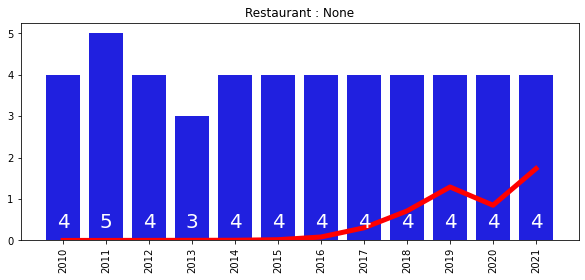

In [701]:
restaurant = None
neighborhood = None
type_rest = None
price = None

#restaurant = [i for i in reviews_only['restaurant_name'].unique()]
#eighborhood = ['Santa Justa']
#type_rest = ['brunch']
#price = [1]

plot_reviews(restaurant, neighborhood, type_rest, price)